# Word Frequencies

## Load Text File
Let's load your file from a local folder. Download your file and save it in the `data` folder from the locaction where you launched this Notebook. You might need a few libraries which you need to import. Usually all the imports are done in the first cell, but this notebook uses imports as and when you need them for your own understanding.

**COLAB NOTEBOOK VERSION:** To run this notebook in CoLab, please [click here](https://colab.research.google.com/github/senthilchandrasegaran/words-as-images/blob/main/reading-text-files.ipynb).

In [1]:
## Uncomment the below lines if needed.
# !pip install spacy
# !pip install pandas
# !pip install seaborn
# !pip install nltk
# !pip install wordcloud

In [2]:
import spacy
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from itertools import zip_longest

In [3]:
with open('./data/carroll-alice.txt', 'r', encoding='utf-8-sig') as fo :
    alice = fo.readlines()

## Write functions to separate and count words

In [4]:
def get_words_tokenized(text_list):
    words_list = []
    for text in text_list:
        words = word_tokenize(text)
        # words = [w.lower() for w in words]
        words_list.append(words)
    return words_list

In [5]:
def count_words(words_list):
    all_words = []
    for words in words_list :
        all_words.extend(words)
    unique_words = list(set(all_words))
    word_counts = [all_words.count(w) for w in unique_words]
    counts_df = pd.DataFrame({'word' : unique_words, 'count' : word_counts})
    return counts_df

In [6]:
def plot_words(df, max_words=40):
    df = df.sort_values(by=['count'], ascending=False)
    df = df[0:max_words]
    plt.figure(figsize=(4,int(max_words/5)), dpi=100)
    g=sns.barplot(y='word', x='count', data=df, color='gray')

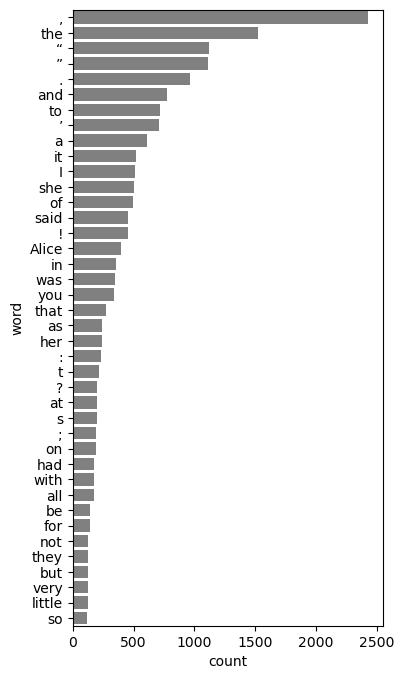

In [7]:
words = get_words_tokenized(alice)
word_counts_df = count_words(words)
plot_words(word_counts_df)

## Remove Punctuations

In [8]:
import string
punctuations = string.punctuation + "’" + '“' + '”' +"‘"

def get_words_tokenized_nopunct(text_lines, puncts=punctuations):
    lines_words_list = []
    for line in text_lines:
        words = word_tokenize(line)
        # words = [w.lower() for w in words]
        words_no_punct = [word for word in words if not word in punctuations]
        lines_words_list.append(words_no_punct)
    return lines_words_list

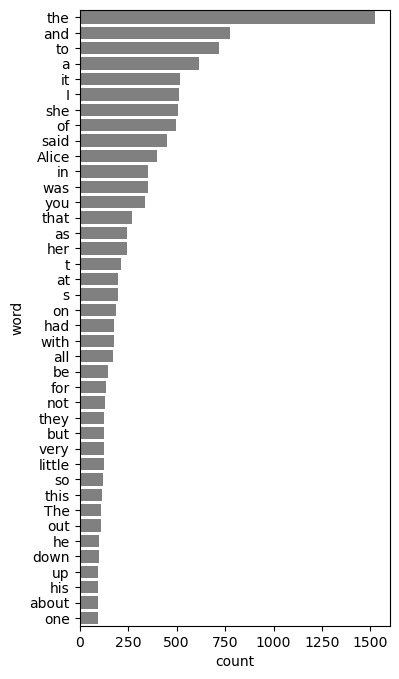

In [9]:
words = get_words_tokenized_nopunct(alice)
word_counts_df = count_words(words)
plot_words(word_counts_df)

## Remove Stopwords

In [10]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords') # uncomment and run this line the first time you run this code.
stop_words = set(stopwords.words('english'))

In [11]:
def get_words_tokenized_nopunct_nostop(lines, puncts=punctuations, stop_w=stop_words):
    line_words_list = []
    for line in lines:
        words = word_tokenize(line.lower())
        words_no_punct = [word for word in words if (not word in punctuations) and (not word in stop_w)]
        line_words_list.append(words_no_punct)
    return line_words_list

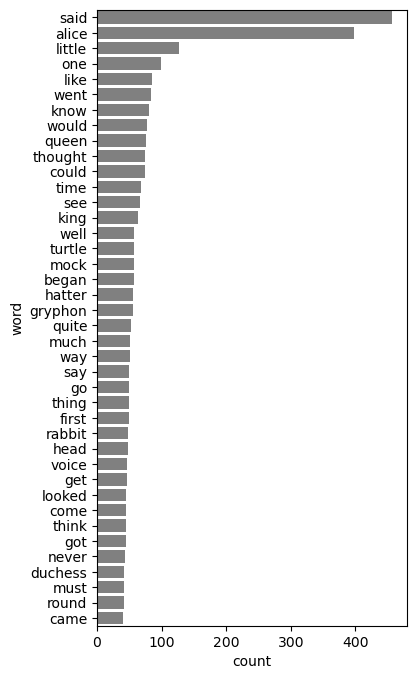

In [12]:
words = get_words_tokenized_nopunct_nostop(alice)
word_counts_df = count_words(words)
plot_words(word_counts_df)

## Optional: Generate WordCloud

In [13]:
word_freq = word_counts_df.set_index('word').to_dict()['count']

(-0.5, 1599.5, 899.5, -0.5)

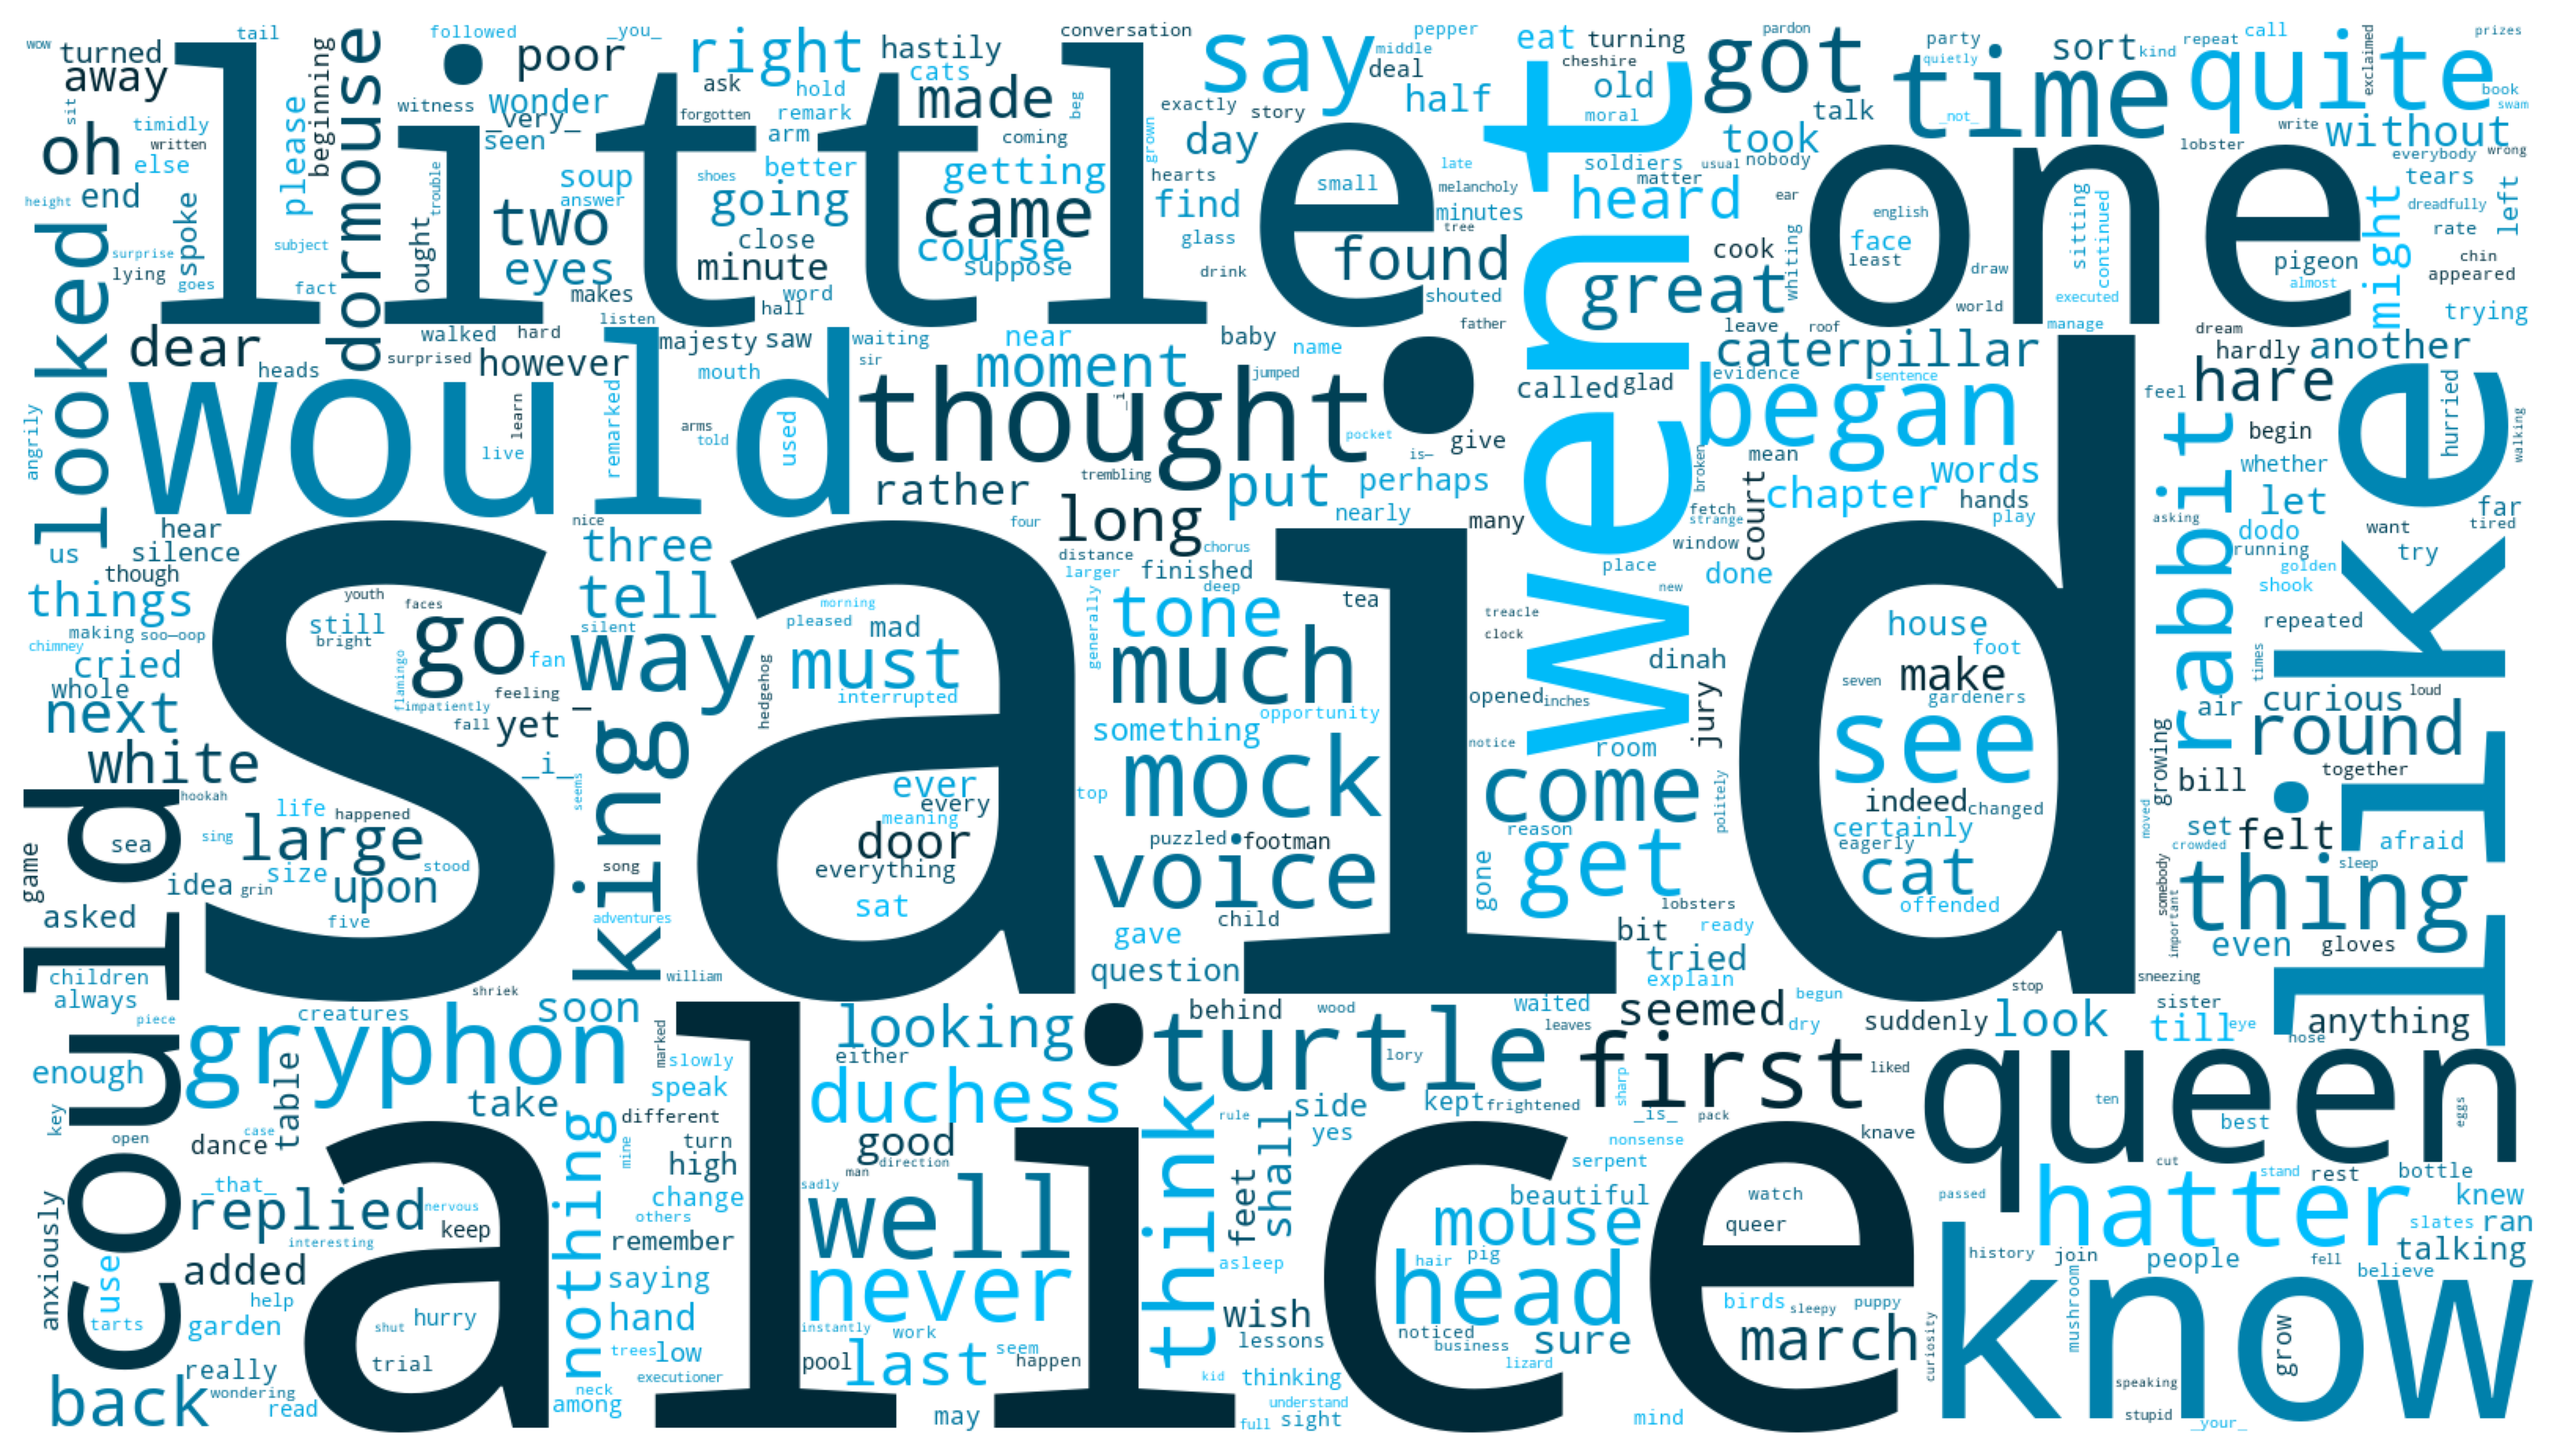

In [14]:
import wordcloud
plt.figure(figsize=(16,9), dpi=300)
wc = wordcloud.WordCloud(width=1600, height=900,
                       background_color="white",
                       color_func = wordcloud.get_single_color_func('deepskyblue'),
                       max_words=500)

wc.generate_from_frequencies(word_freq)
plt.imshow(wc)
plt.axis('off')

In [15]:
def grouper(input_list, num_groups, remaining_spaces=''):
    # grouper('abcdefg', 3, remaining_spaces='x') --> ('a','b','c'), ('d','e','f'), ('g','x','x')
    group_size = math.ceil(len(input_list)/num_groups)
    grouped_list = list(zip_longest(*[iter(input_list)]*group_size, fillvalue=remaining_spaces))
    grouped_list = [list(g) for g in grouped_list]
    last_item = ' '.join(grouped_list[-1]).split()
    if len(last_item) <= 2 :
        grouped_list[-2].extend(last_item)
        grouped_list.pop()
    output = [' '.join(list(group)).strip() for group in grouped_list]
    return output

def plot_word_cloud_timeline(text_list, num_segments=10, stopwords=STOPWORDS):
    grouped_text = grouper(text_list, num_segments)
    fig = plt.figure(constrained_layout=True, dpi=300)
    widths = [1 for x in grouped_text]
    color_func = lambda *args, **kwargs: 'black'
    spec = fig.add_gridspec(ncols=len(grouped_text),
                            width_ratios=widths,
                            wspace=0.0, hspace=0.0)
    for ind, text in enumerate(grouped_text):
        ax = fig.add_subplot(spec[ind])
        wc = WordCloud(width=500, height=500,
                       background_color="white",
                       color_func=color_func,
                       max_words=100,
                       stopwords=STOPWORDS)
        wc.generate_from_text(text)
        ax.imshow(wc)
        ax.axis("off")
    plt.savefig('../plots/timeline_wordcloud.pdf', bbox_inches='tight')

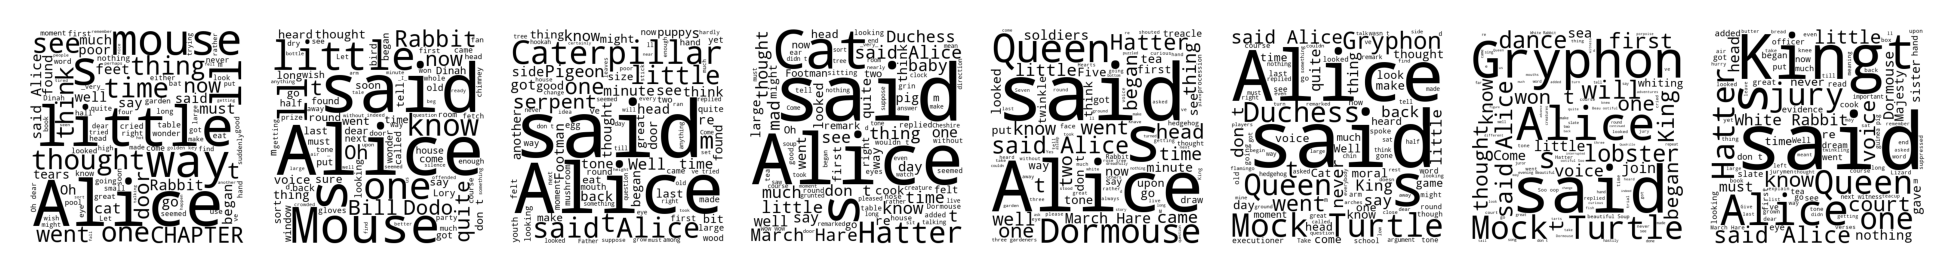

In [16]:
plot_word_cloud_timeline(alice, num_segments=8)

## Concordances or Keywords in Context (KWIC)

In [17]:
from nltk.text import Text
alice_text = ' '.join(alice)
tokens = word_tokenize(alice_text)
textList = Text(tokens)
textList.concordance('said', width=85, lines=25)

Displaying 25 of 457 matches:
iles I ’ ve fallen by this time ? ” she said aloud . “ I must be getting somewhere n
which certainly was not here before , ” said Alice , ) and round the neck of the bot
urry . “ No , I ’ ll look first , ” she said , “ and see whether it ’ s marked ‘ _po
 * * * * * “ What a curious feeling ! ” said Alice ; “ I must be shutting up like a 
his ; “ for it might end , you know , ” said Alice to herself , “ in my going out al
here ’ s no use in crying like that ! ” said Alice to herself , rather sharply ; “ I
n currants . “ Well , I ’ ll eat it , ” said Alice , “ and if it makes me grow large
 happens ! ” She ate a little bit , and said anxiously to herself , “ Which way ? Wh
You ought to be ashamed of yourself , ” said Alice , “ a great girl like you , ” ( s
em . “ I ’ m sure I ’ m not Ada , ” she said , “ for her hair goes in such long ring
 sure those are not the right words , ” said poor Alice , and her eyes filled with t
ired of being all alone here ! ” As